In [1]:
import layoutparser as lp
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/home/students/s121md105_05/tesseract-binary/bin/tesseract'

#load segmentation model
model = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [2]:
#load image
image_path = "../../21S1_URECA_FYP/ST2020-01/IMG_5604.PNG"
image = cv2.imread(image_path)
image = image[..., ::-1]

In [3]:
#output of detection
layout = model.detect(image)

/home/students/s121md105_05/anaconda3/envs/ureca/lib/python3.8/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/students/s121md105_05/anaconda3/envs/ureca/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180544224/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
#seperate image and text
# images = []
text = []
for output in layout:
    if output.type == 'TextRegion':
        text.append(output)
#     else:
#         images.append(output)

In [17]:
import math

#prepare ocr input
unsorted_boxes = []
for i in text:
    if i.score>= 0.9:
        box = {}
        box['score'] = i.score
        box['boundary'] = [(math.floor(i.block.x_1),math.floor(i.block.y_1)),(math.ceil(i.block.x_2),math.ceil(i.block.y_2))]
        box['center'] = ((i.block.x_1+i.block.x_2)/2,(i.block.y_1+i.block.y_2)/2)
        unsorted_boxes.append(box)
# sorted_boxes = sorted(unsorted_boxes, key=lambda d: (round(d['center'][0]),d['center'][1]))

In [26]:
#OCR
# temporary
sorted_boxes = unsorted_boxes

for i in range(len(sorted_boxes)):
    left = sorted_boxes[i]['boundary'][0][0]
    top = sorted_boxes[i]['boundary'][0][1]
    right = sorted_boxes[i]['boundary'][1][0]
    bottom = sorted_boxes[i]['boundary'][1][1]
    crop_image = image[top:bottom,left:right]
    print(pytesseract.image_to_string(crop_image).replace('\r', '').replace('-\n', '').replace('\n', ' '))
    print()
#     for key in result:
#         f = open('zc_test/'+'IMG_5841_result.txt', "a")
#         f.write(result[key][1])
#         f.a()
#     im = Image.fromarray(image_framed)
#     im.save('zc_test/IMG_5841_'+str(i)+'_result.png')

plucked from hundreds in the British Museum's hoard of items on reserve. It came to the museum in the 1950s, excavated by aman with the fitting name of John Valentine  Calin 

Staff at the British Museum hope the cup display, which opened earlier this month, will leave visitors thinking about the growing consequences of our love for the disposable. 

“Just like us, they didn’t want to wash up,” curator Julia Farley said of the Minoans who dumped thousands of the clay vessels as they built an advanced Bronze Age civilisation marked by palaces, written language and lavish art. 

made from washed-up beach garbage is meant as a commentary on pollution, the museum says. Photographs from around the Pacific will capture the massive amounts of plastic collecting in the ocean. 

Made of clay, it may have held wine before it was thrown out after anancient party on the island of Crete in Greece 

The museum said In a statement hat it is trying to reduce its impact on the environment by recycling 

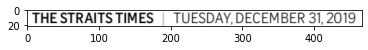

In [28]:
#visualization
import matplotlib.pyplot as plt
i = -1
left = sorted_boxes[i]['boundary'][0][0]
top = sorted_boxes[i]['boundary'][0][1]
right = sorted_boxes[i]['boundary'][1][0]
bottom = sorted_boxes[i]['boundary'][1][1]
plt.imshow(image[top:bottom,left:right])